# Data Analysis of Building Energy Benchmarking Data 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Part 1: Data Cleaning and Preprocessing

## 1.1 Load and Inspect the Dataset

In [6]:
data=pd.read_csv("Building_Energy_Benchmarking.csv")
data.shape #Shape of the dataset

(494, 31)

In [7]:
data.head(3)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956


In [8]:
data.columns #column names of the dataset

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Ons

In [9]:
data.dtypes #datatypes of each columns

Property Id                                                                int64
Property Name                                                             object
Address 1                                                                 object
City                                                                      object
Postal Code                                                               object
Province                                                                  object
Primary Property Type - Self Selected                                     object
Number of Buildings                                                        int64
Year Built                                                                 int64
Property GFA - Self-Reported (m²)                                         object
ENERGY STAR Score                                                        float64
Site Energy Use (GJ)                                                      object
Weather Normalized Site Ener

In [10]:
#Percentage of missing values in each column
missing = (data.isnull().sum() / len(data)) * 100
print(missing)

Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                                      0.000000
Weat

In [11]:
data.isna().sum()

Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                0
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                          0
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                       0
Weather Normalized Site Energy Use (GJ)                                    0

In [12]:
missing[missing>40].index.tolist() #Columns with more than 40% missing values

['ENERGY STAR Score',
 'District Hot Water Use (GJ)',
 'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
 'Green Power - Onsite and Offsite (kWh)',
 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)']

In [13]:
missing[(missing<40) & (missing > 0.000001)].index.tolist() #Columns with missing values which should be filled.

['Weather Normalized Source Energy Use (GJ)', 'Natural Gas Use (GJ)']

## 1.2 Handling Missing Data

In [14]:
df=data.copy() #made a dataset copy to work further.

In [15]:
#Dropped columns with more than 40% missing values
df = df.drop(columns=['ENERGY STAR Score','District Hot Water Use (GJ)',
 'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
 'Green Power - Onsite and Offsite (kWh)',
 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)'])

In [16]:
#Conerting to the correct datatypes of each columns so that can fill missing value accordingly
df['Weather Normalized Source Energy Use (GJ)'] = pd.to_numeric(df['Weather Normalized Source Energy Use (GJ)'].replace(r',', '', regex=True), errors='coerce')
df['Natural Gas Use (GJ)'] = pd.to_numeric(df['Natural Gas Use (GJ)'].replace(r',', '', regex=True), errors='coerce')

In [17]:
#Filled missing values with median as the column is numeric type
df['Weather Normalized Source Energy Use (GJ)']=df['Weather Normalized Source Energy Use (GJ)'].fillna(df['Weather Normalized Source Energy Use (GJ)'].median())
df['Natural Gas Use (GJ)']=df['Natural Gas Use (GJ)'].fillna(df['Natural Gas Use (GJ)'].median())
df.isna().sum()

Property Id                                   0
Property Name                                 0
Address 1                                     0
City                                          0
Postal Code                                   0
Province                                      0
Primary Property Type - Self Selected         0
Number of Buildings                           0
Year Built                                    0
Property GFA - Self-Reported (m²)             0
Site Energy Use (GJ)                          0
Weather Normalized Site Energy Use (GJ)       0
Site EUI (GJ/m²)                              0
Weather Normalized Site EUI (GJ/m²)           0
Source Energy Use (GJ)                        0
Weather Normalized Source Energy Use (GJ)     0
Source EUI (GJ/m²)                            0
Weather Normalized Source EUI (GJ/m²)         0
Total GHG Emissions (Metric Tons CO2e)        0
Total GHG Emissions Intensity (kgCO2e/m²)     0
Direct GHG Emissions (Metric Tons CO2e) 

## 1.3 Extracting and Cleaning Data Using Regex

In [18]:
#Extract numeric values from text-based numeric columns (e.g., Property GFA,Energy Use, Emissions).
def extract_number(d):
    if type(d)==str:  #checks the column is object becasue here numeric columns are text based but for question 1.2 i have already changed some columns datatype for cleaning.
        n = re.findall(r"\d+\.?\d*", d)#using expression finding the digits, number part and decimal part matches
        return float(n[0]) if n else None  
    return None  
numCol = ["Property GFA - Self-Reported (m²)", "Site Energy Use (GJ)","Weather Normalized Site Energy Use (GJ)","Source Energy Use (GJ)", 
          "Total GHG Emissions (Metric Tons CO2e)","Direct GHG Emissions (Metric Tons CO2e)","Electricity Use - Grid Purchase (kWh)"]
for col in numCol:
    df[col] = df[col].apply(extract_number)
df[numCol] = df[numCol].astype(float)
df.dtypes

Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)             float64
Site Energy Use (GJ)                          float64
Weather Normalized Site Energy Use (GJ)       float64
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                        float64
Weather Normalized Source Energy Use (GJ)     float64
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

In [19]:
df["Postal Code"].unique() #to see the pattern of cuurent code data

array(['T2H 0Z4', 't2e7l7', 'T2G 0W2', 'T2G0G2', 'T2G 4M7', 'T2N 2H8',
       'T2R 0G9', 'T2AoK9', 'T3B 0B9', 'T2G0K7', 'T2C 4E1', 'T2W 6G3',
       'T2E 8L9', 'T2B 3E2', 'T2G1W5', 'T2B0M5', 'T2E6R2', 'T2G2N9',
       'T2E 5R1', 'T2K 6K8', 'T2N 3G8', 'T2A0K9', 'T2G 3H2', 'T2G 5E3',
       'T2M 4V8', 'T3E1P1', 'T2A 3E2', 'T2V 5H5', 'T3B 1S4', 'T2K 5J6',
       'T2J 6X3', 'T2R1M4', 'T3E 7B2', 'T3B 5A4', 'T1Y 4Z4', 'T2W 4H7',
       'T2C 2X1', 'T3A 4M8', 'T3H 3R7', 'T2Z 0N2', 'T3H 3E4', 'T3R0N2',
       'T3B 5Y6', 'T3A 5G1', 'T2Y 5G9', 'T2Z 0H3', 'T2E8E1', 'T3P 0A3',
       'T3M 0M2', 'T3L 2Y8', 'T2T3V8', 'T2M 3A3', 'T3C 2C3', 'T2C 3B7',
       'T2N 3Y9', 'T2A0S4', 'T2J 4B5', 'T2L0A2', 'T3E 1P2', 'T2E8A1',
       'T2S 2G4', 'T2G 1J9', 'T2V2W2', 'T3E2J7', 'T3E 3H3', 'T2G 4K8',
       'T2G 4H3', 'T2G4K8', 'T2E 6S2', 'T2S 0A1', 'T2P 2M5', 'T2K 0A2',
       'T3E 0R4', 'T2A 4M6', 'T3S 0A4', 'T3E7H5', 'T2C0B4', 'T3H3P8',
       'T2E 7L7', 'T2L 0A2', 'T2G 0G2', 'T3H 3M4', 'T2G 0K7', 'T2G 1W5',
 

In [20]:
#Standardize Postal Codes to follow the Canadian format (A1A 1A1)
#Convert the string to upper case then removed not alphabet and number objects 
df['Postal Code']=df['Postal Code'].str.upper().replace(r"[^A-Z0-9]","",regex=True)
df['Postal Code']=df['Postal Code'].str.replace(r"(\w{3})(\w{3})",r"\1 \2",regex=True)

In [21]:
df["Postal Code"].unique()#checking the changes have been occured

array(['T2H 0Z4', 'T2E 7L7', 'T2G 0W2', 'T2G 0G2', 'T2G 4M7', 'T2N 2H8',
       'T2R 0G9', 'T2A OK9', 'T3B 0B9', 'T2G 0K7', 'T2C 4E1', 'T2W 6G3',
       'T2E 8L9', 'T2B 3E2', 'T2G 1W5', 'T2B 0M5', 'T2E 6R2', 'T2G 2N9',
       'T2E 5R1', 'T2K 6K8', 'T2N 3G8', 'T2A 0K9', 'T2G 3H2', 'T2G 5E3',
       'T2M 4V8', 'T3E 1P1', 'T2A 3E2', 'T2V 5H5', 'T3B 1S4', 'T2K 5J6',
       'T2J 6X3', 'T2R 1M4', 'T3E 7B2', 'T3B 5A4', 'T1Y 4Z4', 'T2W 4H7',
       'T2C 2X1', 'T3A 4M8', 'T3H 3R7', 'T2Z 0N2', 'T3H 3E4', 'T3R 0N2',
       'T3B 5Y6', 'T3A 5G1', 'T2Y 5G9', 'T2Z 0H3', 'T2E 8E1', 'T3P 0A3',
       'T3M 0M2', 'T3L 2Y8', 'T2T 3V8', 'T2M 3A3', 'T3C 2C3', 'T2C 3B7',
       'T2N 3Y9', 'T2A 0S4', 'T2J 4B5', 'T2L 0A2', 'T3E 1P2', 'T2E 8A1',
       'T2S 2G4', 'T2G 1J9', 'T2V 2W2', 'T3E 2J7', 'T3E 3H3', 'T2G 4K8',
       'T2G 4H3', 'T2E 6S2', 'T2S 0A1', 'T2P 2M5', 'T2K 0A2', 'T3E 0R4',
       'T2A 4M6', 'T3S 0A4', 'T3E 7H5', 'T2C 0B4', 'T3H 3P8', 'T3H 3M4',
       'T2K 4Y5', 'T3B 5K9', 'T3B 1C5', 'T3C 1Y3', 

In [22]:
#extracting meaningful text from column property name and addresses.
#Removing leading and trailing spaces from string and converting first letter of each string to uppercase.
df["Property Name"]=df["Property Name"].str.strip().str.title()
df["Address 1"]=df["Address 1"].str.strip().str.title()

# Part 2: Exploratory Data Analysis (EDA) and Aggregations

## 2.1 Statistical Summary

• Generate summary statistics for numerical features using extracted data.
• Identify and explain key observations (e.g., outliers, mean vs. median differences).

In [23]:
df.describe()

,Property Id,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending
count,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000
mean,1.308877e+07,1.060729,1980.091093,1974.198583,3586.745951,3699.120445,1.774798,1.810324,4556.838259,10221.438866,2.282753,2.319717,442.468623,158.671660,213.686235,63.821862,2.539227e+05,5520.693522,2020.995951
std,5.659556e+06,0.278281,25.159568,6799.500086,15596.320164,15776.584078,1.306700,1.331529,18232.674955,22866.650000,1.597846,1.622897,1078.852509,109.472637,713.805808,56.835735,8.348778e+05,17218.457051,1.414208
min,6.169481e+06,1.000000,1896.000000,1.000000,1.000000,1.000000,0.060000,0.060000,1.000000,146.000000,0.110000,0.110000,1.000000,10.200000,0.000000,0.000000,1.000000e+00,3.000000,2019.000000
25%,9.563763e+06,1.000000,1970.000000,2.000000,3.000000,3.000000,0.990000,1.000000,4.000000,1562.825000,1.312500,1.350000,77.125000,93.100000,41.000000,33.325000,1.132500e+02,861.050000,2020.000000
50%,9.997794e+06,1.000000,1978.000000,216.950000,79.500000,81.000000,1.290000,1.310000,36.500000,3144.800000,1.680000,1.690000,173.000000,117.600000,74.000000,43.900000,4.620000e+02,1569.750000,2021.000000
75%,2.198860e+07,1.000000,1996.000000,1448.750000,1558.500000,1677.500000,2.065000,2.110000,2079.250000,9637.275000,2.622500,2.652500,446.200000,186.975000,223.075000,74.050000,1.491705e+05,4816.200000,2022.000000
max,2.198863e+07,3.000000,2018.000000,85941.000000,243202.000000,242611.000000,8.430000,8.360000,261481.000000,260399.000000,10.130000,10.060000,13067.000000,666.200000,12243.000000,386.000000,9.618602e+06,238415.000000,2023.000000


**_Interpretation:
Property Id: Sequential data as it has wide range.<br>
Number of Buildings: mean 1.06, min 1 and max 5.
Year Built: Average construction year 1980, oldest is 1896, new built in 2018, mean is higher than median there's likely data skewed.<br>
Property GFA - Self-Reported (m²): mean 1974,median 216, exterme outliers peresent.<br>
Site Energy Use (GJ): mean 3586, median 79, highly skewed data.<br>
Weather Normalized Site Energy Use (GJ): mean 3699, median 81,highly skewed data,some large properties consugme not proper energy.<br>
Site EUI (GJ/m²):	mean 1, median 1, not skewed.<br>
Weather Normalized Site EUI (GJ/m²):	mean 1, median 1, not skewed.<br>
Source Energy Use (GJ):	mean 4556, median 36, highly skewed data.<br>
Weather Normalized Source Energy Use (GJ): mean 10221, median 3144, highly skewed data.<br>
Source EUI (GJ/m²): mean 2, median 1, normal distribution but also some outliers.<br>
Weather Normalized Source EUI (GJ/m²):	mean 2 ,median 1,normal distribution but also some outliers.<br>
Total GHG Emissions (Metric Tons CO2e):	mean 442, median 173, max 13067 which have huge outliers and few properties with very high emissions.<br>
Total GHG Emissions Intensity (kgCO2e/m²):	mean 153, median 117 very few properties have extremely high emissions.<br>
Direct GHG Emissions (Metric Tons CO2e): mean 213, median 74,max 12243,min 0, Highly Skewed Distribution.<br>
Direct GHG Emissions Intensity (kgCO2e/m²):	mean 63, median 43,max 386, min 0, moderate right skew.<br>
Electricity Use - Grid Purchase (kWh): mean 2.539227e+05, median 4.620000e+02,	max 9.618602e+06, min 1.000000e+00, Extremely Skewed Distribution.<br>
Natural Gas Use (GJ): mean 5520, median 1569, max 238415,min 3, data is right-skewed.<br>
Year Ending: mean 2020, median 2021 , max 2023,min 2019_**

## 2.2 Aggregations

In [24]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',
       'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)',
       'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)',
       'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)',
       'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'Year Ending', 'Unique ID'],
      dtype='object')

• Compute the average Energy Use Intensity (EUI) by Property Type.
• Compute the total Greenhouse Gas (GHG) emissions by year.
• Identify the top 5 properties with the highest total energy consumption.

In [25]:
#Found the average energy use intensity by using property type and Site EUI columns.
ptype = df.groupby("Primary Property Type - Self Selected")["Site EUI (GJ/m²)"].mean()
print(ptype.sort_values(ascending=False))

Primary Property Type - Self Selected
Heated Swimming Pool                                4.805333
Fitness Center/Health Club/Gym                      4.385000
Distribution Center                                 3.286000
Ice/Curling Rink                                    2.182200
Other - Recreation                                  2.165000
Museum                                              1.584000
Social/Meeting Hall                                 1.550000
Other - Public Services                             1.526000
Office                                              1.519636
Performing Arts                                     1.302000
Repair Services (Vehicle, Shoe, Locksmith, etc.)    1.248000
Fire Station                                        1.208827
Self-Storage Facility                               1.208000
Indoor Arena                                        1.106000
Non-Refrigerated Warehouse                          0.768000
Mixed Use Property                             

In [26]:
#found by the ending of year total emission of greenhouse gas.
gh = df.groupby("Year Ending")["Total GHG Emissions (Metric Tons CO2e)"].sum()
print(gh)

Year Ending
2019    22799.1
2020    24036.9
2021    24310.5
2022    72301.0
2023    75132.0
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64


In [27]:
#top 5 property which have highest total energy consumption.
top5 = df.sort_values(by="Site Energy Use (GJ)", ascending=False).head(5)[["Property Name", "Site Energy Use (GJ)"]]
print(top5)

                     Property Name  Site Energy Use (GJ)
293        Stoney Transit Facility              243202.0
457        Stoney Transit Facility              160486.0
296  Village Square Leisure Centre               80302.0
307              Municipal Complex               79602.0
73               Municipal Complex               79343.0


## 2.3 Detecting Outliers Using Regex and IQR

o Identify values that do not conform to expected numeric formats.
o Remove or correct incorrectly formatted numeric values.
• Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions
(Metric Tons CO2e).
• Replace outliers with the median value for that property type.

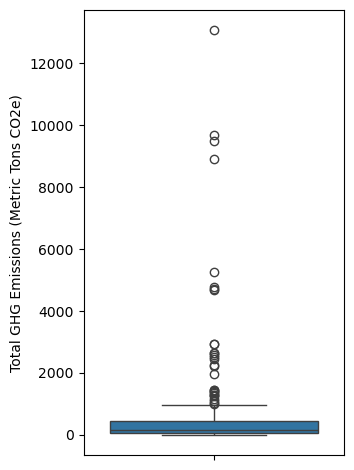

In [28]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Total GHG Emissions (Metric Tons CO2e)"])
plt.tight_layout()
plt.show()

In [29]:
Q1 = df["Total GHG Emissions (Metric Tons CO2e)"].quantile(0.25)
Q3 = df["Total GHG Emissions (Metric Tons CO2e)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median = df["Total GHG Emissions (Metric Tons CO2e)"].median()
df.loc[(df["Total GHG Emissions (Metric Tons CO2e)"] < lower_bound) | (df["Total GHG Emissions (Metric Tons CO2e)"] > upper_bound), "Total GHG Emissions (Metric Tons CO2e)"] = median


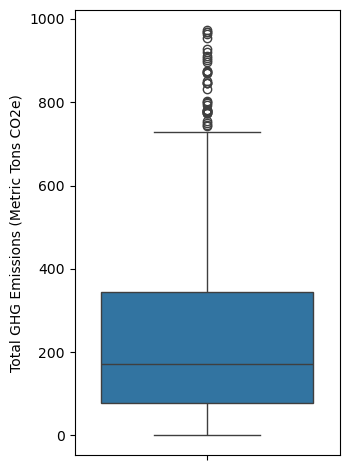

In [30]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Total GHG Emissions (Metric Tons CO2e)"])
plt.tight_layout()
plt.show()

**_Interpretation: Before outlier handled the distribution was highly skewed and after handling the extreme values have been removed but still some there even though its controlled._**

# Part 3: Data Visualization

## 3.1 Time-Series Visualization

Plot the yearly trend of average Site Energy Use Intensity (EUI).
• Highlight any significant increases or decreases in energy usage.

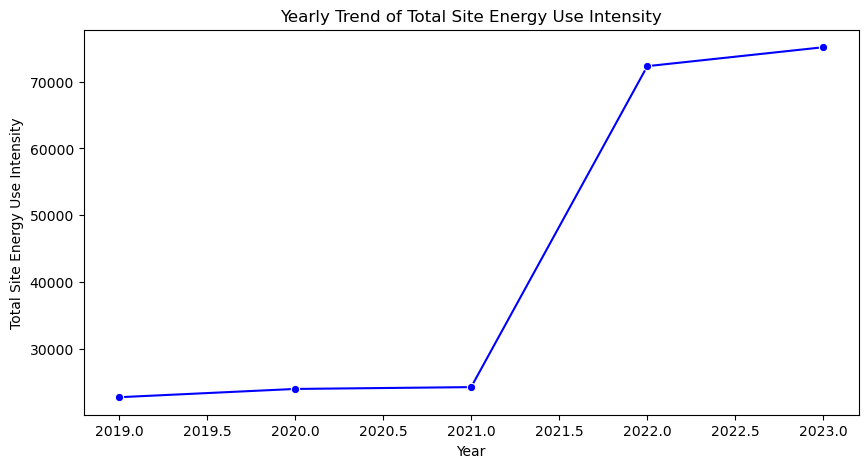

In [31]:
eui = df.groupby("Year Ending")["Site EUI (GJ/m²)"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=gh.index, y=gh.values, marker="o", color="b")
plt.title("Yearly Trend of Total Site Energy Use Intensity")
plt.xlabel("Year")
plt.ylabel("Total Site Energy Use Intensity")
plt.show()

**_Interpretation: From 2019 to 2021 have a small increase but from 2021 to 2022 sudden spike just from 30000 it went upto 70000 which indicates the usage inrease and at last it remained the same value from 2022 to 2023_**

## 3.2 Comparative Bar Charts

• Create a bar chart showing the top 10 buildings with the highest GHG emissions.
• Annotate the bar chart with emission values.

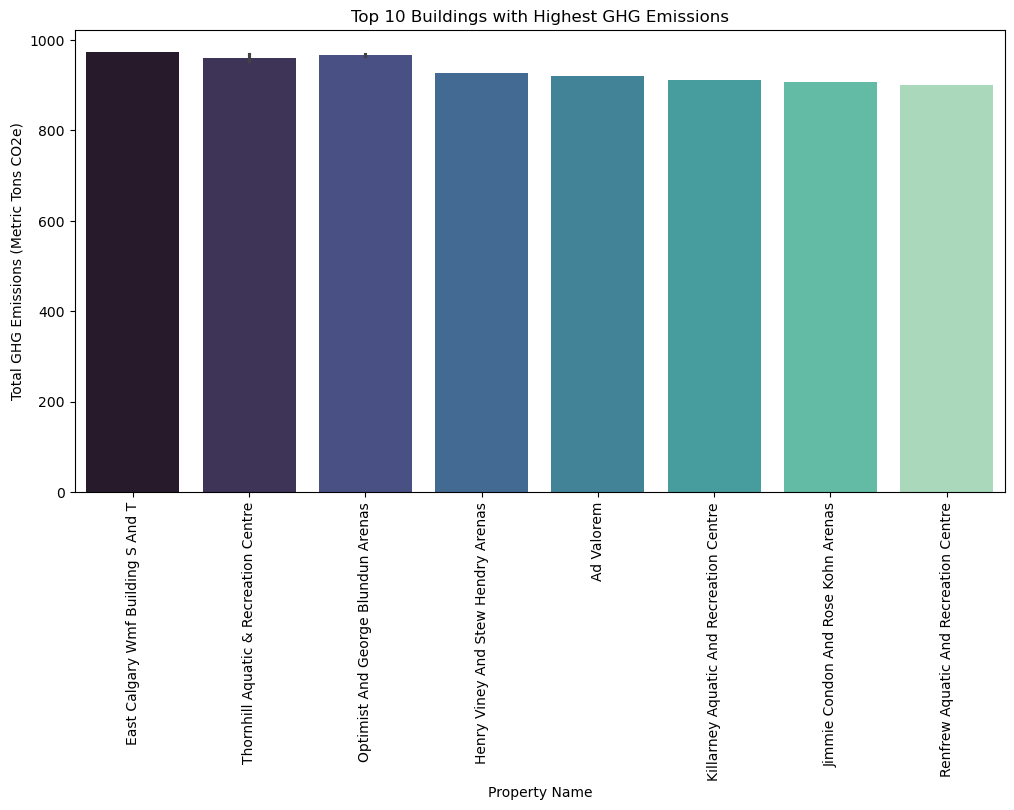

In [32]:
top10_ghg = df.sort_values(by="Total GHG Emissions (Metric Tons CO2e)", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_ghg["Property Name"], y=top10_ghg["Total GHG Emissions (Metric Tons CO2e)"],hue=top10_ghg["Property Name"], palette="mako")
plt.xticks(rotation=90)
plt.title("Top 10 Buildings with Highest GHG Emissions")
plt.xlabel("Property Name")
plt.ylabel("Total GHG Emissions (Metric Tons CO2e)")
plt.show()

**_Interpretation: the property which have highest Greenhouse gas emissions are East Calgary Wwft Building S And T,Thornhill Aquatic & Recreation Centre, Optimist And George Blundun Arenas, Henry Viney And Stew Hendry Arenas, Ad Valorem, Killarney Aquatic And Recreation Centre, Jimmie Condon And Rose Kohn Arenas, Renfrew Aquatic And Recreation Centre, the emissions are close to 1000 metric tons of CO2 equivalent_**

## 3.3 Heatmap Visualization

Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property
types.

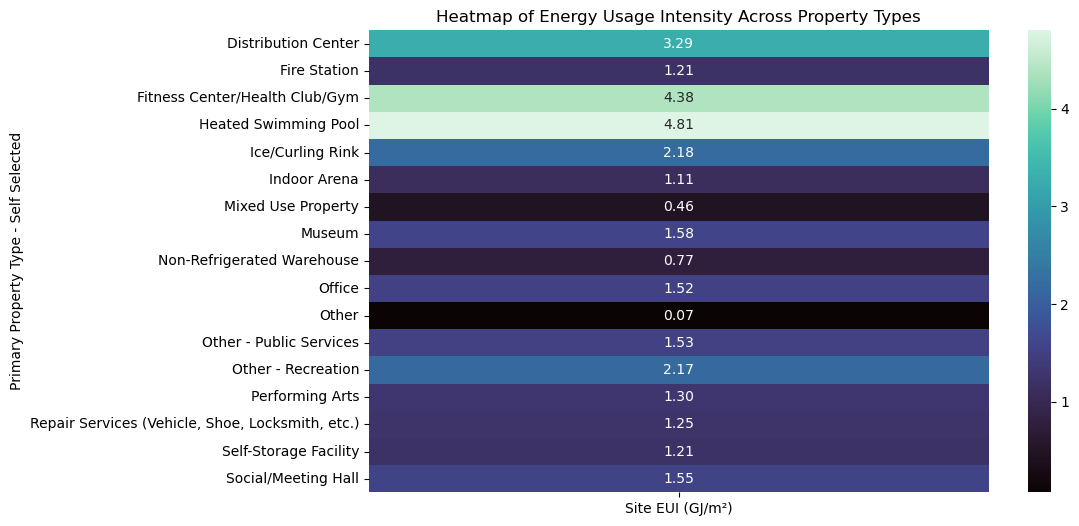

In [33]:
pivot_table = df.pivot_table(values='Site EUI (GJ/m²)', index='Primary Property Type - Self Selected', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="mako", annot=True, fmt=".2f")
plt.title("Heatmap of Energy Usage Intensity Across Property Types")
plt.show()

**_Interpretation: Heated Swimming Pool: Highest energy usage intensity at 4.81, Fitness Center/Health Club/Gym: Second highest at 4.38._**

# Part 4: Further Analysis

## 4.1 Correlation Analysis

Compute and visualize the correlation matrix between energy consumption, emissions,
and building size.
• Identify any strong correlations and explain their implications

In [34]:
corrdf = ['Site Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']
corrdf=df[corrdf]

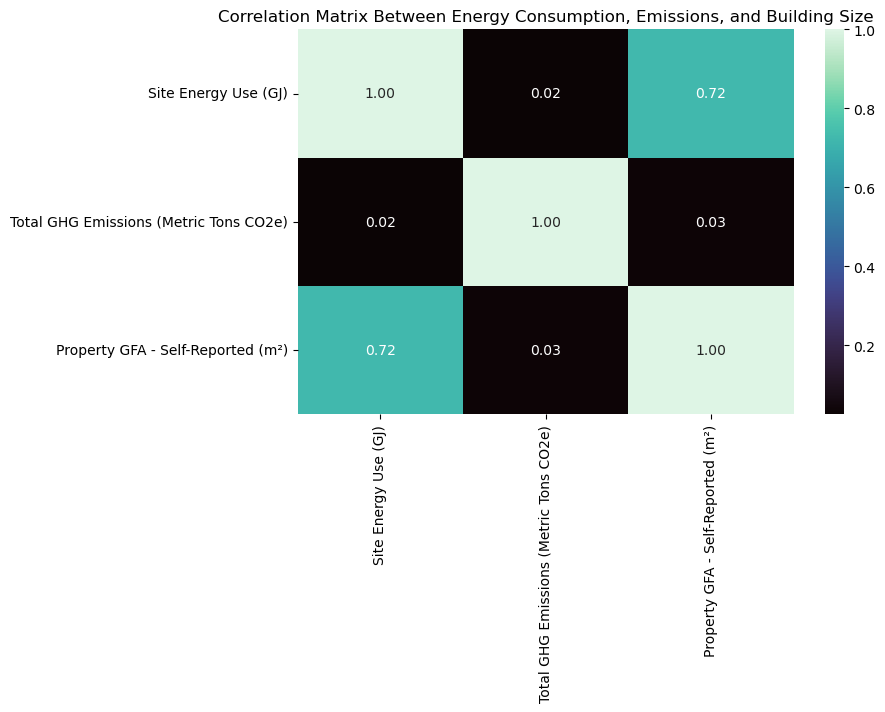

In [47]:

corr_matrix = corrdf.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, cmap="mako", annot=True, fmt=".2f")
plt.title("Correlation Matrix Between Energy Consumption, Emissions, and Building Size")
plt.show()

**_Interpretation: Strong correlation is there btw Site Energy Use (GJ) and Property GFA - Self-Reported (m²) which is 0.72 which means when the size of property increases the usage of energy also increases. Weak correlations btw Site Energy Use (GJ) and Total GHG Emissions (Metric Tons CO2e) which is 0.02 that means there is no relationship btw the amount of energy used and total greenhouse gas emission and btw Total GHG Emissions (Metric Tons CO2e) and Property GFA - Self-Reported (m²) which is 0.03 no relationship btw both of them_**

## 4.2 Hypothesis Testing

• Conduct a t-test 
• Interpret the results and discuss statistical significance.

In [36]:
office = data[data["Primary Property Type - Self Selected"] == "Office"]["ENERGY STAR Score"].dropna()
ice= data[data["Primary Property Type - Self Selected"] == "Ice/Curling Rink"]["ENERGY STAR Score"].dropna()
print(office.shape,ice.shape)

(94,) (45,)


In [37]:
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(office, ice, nan_policy='omit')
print("T-Test Results:", stat, p_value)
if p_value < 0.05:
    print("Statistically significant difference in ENERGY STAR Scores between Office and Ice/Curling Rink")
else:
    print("No significant difference found.")

T-Test Results: 3.2423927715555587 0.0014886772098221066
Statistically significant difference in ENERGY STAR Scores between Office and Ice/Curling Rink


**_Interpretation: p-value is smaller than the significance level of 0.05 we can reject the null hypothesis, the mean ENERGY STAR Scores for Office properties are significantly different from those of Ice/Curling Rink properties._**

## Additional Tasks

In [48]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',
       'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)',
       'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)',
       'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)',
       'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'Year Ending', 'Unique ID'],
      dtype='object')

In [51]:
#Analyze the relationship between building age and energy efficiency
df_new=pd.DataFrame()
df_new["Building Age"] = 2025 - df["Year Built"]
df_new["Energy Efficiency (GJ/sqm)"] = df["Site Energy Use (GJ)"] / df["Property GFA - Self-Reported (m²)"]
df_new

,Building Age,Energy Efficiency (GJ/sqm)
0,15,3.688792
1,44,1.114028
2,51,0.600808
3,46,0.643291
4,25,3.153056
...,...,...
489,65,1.395833
490,43,1.209386
491,61,2.016471
492,47,1.052347


C:\Users\megha\AppData\Local\Temp\ipykernel_21948\3010185319.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10ghg["Property Name"],y=top10ghg["Total GHG Emissions (Metric Tons CO2e)"],palette="mako",ax=axs[1])


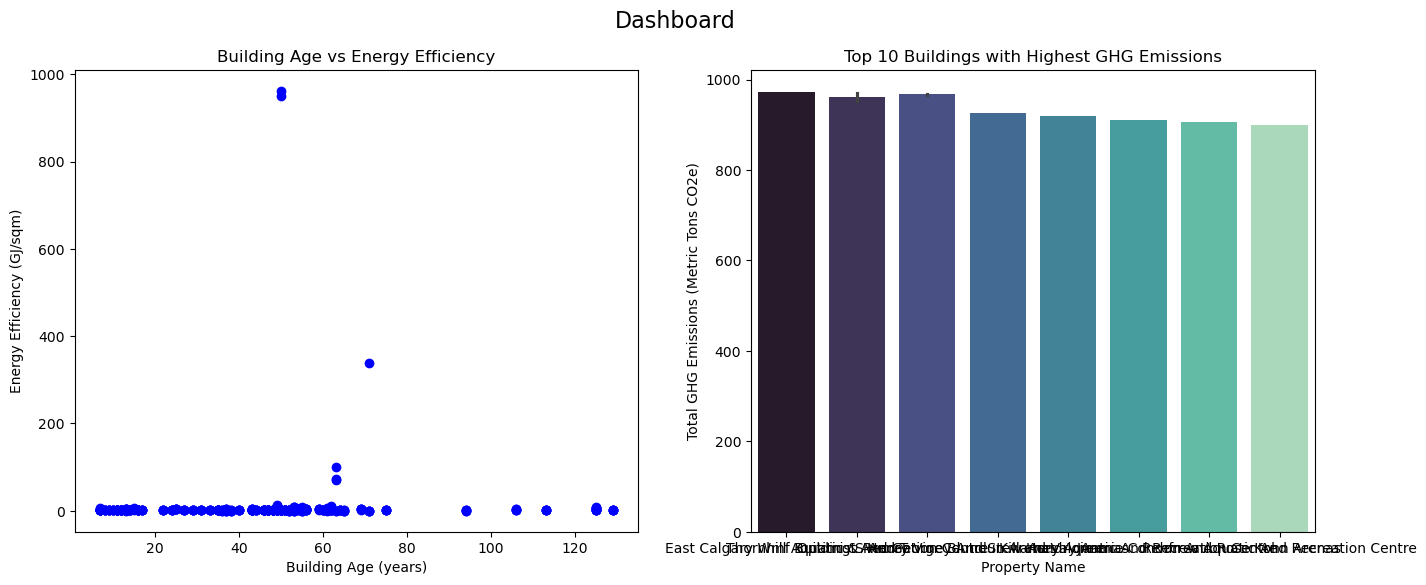

In [68]:
#Generate a dashboard-style visualization
fig, axs = plt.subplots(1,2, figsize=(16, 6))
fig.suptitle("Dashboard", fontsize=16)
axs[0].scatter(df_new["Building Age"], df_new["Energy Efficiency (GJ/sqm)"], color="blue")
axs[0].set_title("Building Age vs Energy Efficiency")
axs[0].set_xlabel("Building Age (years)")
axs[0].set_ylabel("Energy Efficiency (GJ/sqm)")

top10ghg = df.sort_values(by="Total GHG Emissions (Metric Tons CO2e)", ascending=False).head(10)
sns.barplot(x=top10ghg["Property Name"],y=top10ghg["Total GHG Emissions (Metric Tons CO2e)"],hue=top10_ghg["Property Name"],palette="mako",ax=axs[1])
#axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_title("Top 10 Buildings with Highest GHG Emissions")
axs[1].set_xlabel("Property Name")
axs[1].set_ylabel("Total GHG Emissions (Metric Tons CO2e)")
#plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

### Github Link:


https://github.com/Megha-R-S/Data-Analysis-of-Building-Energy-Benchmarking-Data